# House Prices - Advanced Regression Techniques

*Анализ выполнила Елизавета Жигар   
11.11.2021  
[LinkedIn](https://www.linkedin.com/in/liza-zhyhar/)*

## Описание

Данный проект представляет собой исследование для определения степени влияния различных факторов на стоимость жилых домов. В ходе выполнения проекта будут рассмотрено 79 переменных (например, тип крыши, количество этажей и площадь гаража), каждая из которых представляет отдельную характеристику дома в штатах Эймс и Айова.
Данные для проекта были взяты с сайта [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

### *Подготовка к анализу*

Сначала, импортируем все необходимые для будущего анализа и визуализации библиотеки.

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Создадим фрейм из исходных данных.

In [411]:
#the training set
train = pd.read_csv('/Users/liza_zhyhar/Desktop/project/train.csv')

In [412]:
#для ознаколмения выведем первые 10 строк таблицы train
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Следующий этап анализа - очистка данных. Поэтому, необходимо узнать названия и количество столбцов с пропущенными значениями.

In [413]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [414]:
null_columns = train.isnull().sum().sort_values(ascending=False)
null_col_df = null_columns.to_frame().reset_index()
null_col_df.columns = ['characteristic', 'total_null']

In [415]:
print(null_col_df[null_col_df['total_null']!=0])

   characteristic  total_null
0          PoolQC        1453
1     MiscFeature        1406
2           Alley        1369
3           Fence        1179
4     FireplaceQu         690
5     LotFrontage         259
6     GarageYrBlt          81
7      GarageCond          81
8      GarageType          81
9    GarageFinish          81
10     GarageQual          81
11   BsmtFinType2          38
12   BsmtExposure          38
13       BsmtQual          37
14       BsmtCond          37
15   BsmtFinType1          37
16     MasVnrArea           8
17     MasVnrType           8
18     Electrical           1


Из таблицы выше можно сделать вывод, что 19 столбцов исходной таблицы имеют пропущенные значения. Для более детального анализа постараемся заменить пустые значения в этих ячейках. Для этого обратимся с файлу data_description.txt, содержащему описание всех столбцов и их возможные значения.

Начнём со столбца, где пропущенно практически 100% значенией - PoolQC. Из файла data_description.txt можно увидеть, что этот столбец может принимать 5 значений: Ex, Gd, TA, Fa и NA. NA означает отсутствие бассейна в доме. Поэтому мы можем заменить пустые значения на "No Pool".

In [416]:
train1 = train[train['PoolQC'] == 'Without Pool']

In [417]:
train['PoolQC'] = train['PoolQC'].fillna('No Pool')

В столбцах MiscFeature, Alley, Fence, FireplaceQu та же ситуация. Заменим пустые значения в них на "None", "No Alley" и "No Fence", "No Fireplace" соответственно.

In [418]:
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('No Alley')
train['Fence'] = train['Fence'].fillna('No Fence')
train['FireplaceQu'] = train['FireplaceQu'].fillna('No Fireplace')

В LotFrontage пропущено 259 значений. Это столбец типа float, обозначающий размер улицы, прилегающей к участку дома. Так как все жилые дома в таблице train разбиты по соседствам (Neighborhood), будет логичным просчитать медиану размера улицы для каждого из соседств. После этого, получившуюся таблицу с соседствами и медианами для каждого из них объединим с пропущенными значениями в исходной таблице с помощью цикла.

In [419]:
# группируем таблице train по соседствам и для каждого просчитываем медиану LotFronage
gr_by_neigh = train.groupby('Neighborhood')['LotFrontage'].median()
# создаём из таблицы словарь где ключами будут соседства, а значениями - медианы
dict_neigh = gr_by_neigh.to_dict()
# с помощью цикла заполним пропущенные значения исходной таблицы значениями из словаря
for i in range(len(train)):
    if np.isnan(train.iloc[i]['LotFrontage']):
        train.at[i, 'LotFrontage']=(dict_neigh[train.iloc[i]['Neighborhood']])

Столбцы GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual связаны между собой, поэтому имеют одинаковое количество пропущенных значений. Во всех столбцах, кроме GarageYrBlt (год постройки гаража), вместо NaN можно вставить значение "No Garage".

In [420]:
train['GarageType'] = train['GarageType'].fillna('No Garage')
train['GarageFinish'] = train['GarageFinish'].fillna('No Garage')
train['GarageQual'] = train['GarageQual'].fillna('No Garage')
train['GarageCond'] = train['GarageCond'].fillna('No Garage')

Столбец GarageYrBlt содержит год постройка гаража. Если гаража в жилом доме нет, то пустые значения заполним надписью 'No Garage'. Так как столбец GarageYrBlt типа float, то при добавлении надписи в пустые ячейки, он изменит тип на object и года будут отображаться в виде 2003.0. Чтобы исправить это, сначала изменим тип столбца на int, а потом заполним пустые значения.

In [421]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
train['GarageYrBlt'] = train['GarageYrBlt'].astype(int)
train['GarageYrBlt'] = train['GarageYrBlt'].replace(0, 'No Garage')

Если в доме нет подвала, то значения в BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond и BsmtFinType1 пропущены. Заполним их с помощью 'No Basement'.

In [422]:
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('No Basement')
train['BsmtExposure'] = train['BsmtExposure'].fillna('No Basement')
train['BsmtQual'] = train['BsmtQual'].fillna('No Basement')
train['BsmtCond'] = train['BsmtCond'].fillna('No Basement')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('No Basement')

В документе data_description.txt не описан случай для пропущенного значения MasVnrType, как это было для других переменных. Поэтому, предположим, что пропущенное значение означает отсутствие облицовки у дома. Если облицовка отсутствует, то MasVnrArea примет значение 0.

In [423]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

In [452]:
gr_by_electrical = train.groupby('Electrical', as_index = False)['Id'].count().sort_values(by = 'Id', \
    ascending = False).rename(columns={'Id': 'Count'})
print(gr_by_electrical)

  Electrical  Count
4      SBrkr   1335
0      FuseA     94
1      FuseF     27
2      FuseP      3
3        Mix      1


Из таблицы видно, что практически у всех домов в столбце Electrical стоит значение "SBrkr". Поэтому, в качестве пропущенного поставим именно это значение.

In [425]:
train['Electrical'] = train['Electrical'].fillna('SBrkr')

Все пропущенные значения были рассмотрены и заполнены. Проверим это с помощью функции isnuul() и сортировки по убыванию.

In [426]:
print(train.isnull().sum().sort_values(ascending=False))

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64


Напротив всех столбцов стоит 0. Это значит, что все пропущенные значения были заполнены и можно переходить на следующий этап.

### *Анализ и визуализация данных*

Суть исследования - определить степень влияния определённых факторов на стоимость жилых домов. Для этого будут построены различные графики (гистограммы, тепловые карты, диаграммы рассеяния) и в конце будет сформулирован вывод касательно зависимости переменных.

Для начала построим гистограмму распределения стоимости жилых домов.

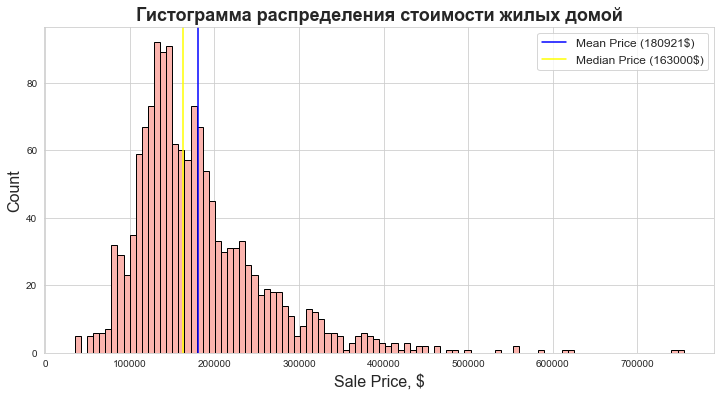

In [453]:
mean_price = train['SalePrice'].mean()
median_price = train['SalePrice'].median()

fig, ax = plt.subplots(figsize = (12, 6))
sns.set_palette("Pastel1")
sns.set_style('whitegrid')
plt.hist(data = train, x = 'SalePrice', bins = 100, edgecolor = 'black')
plt.title('Гистограмма распределения стоимости жилых домой', fontweight = 'bold', fontsize = 18)
plt.xlabel('Sale Price, $', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.axvline(mean_price, color = 'blue', linestyle = 'solid', label = 'Mean Price ({}$)'.\
            format(int(mean_price)))
plt.axvline(median_price, color = 'yellow', linestyle = 'solid', label = 'Median Price ({}$)'.\
            format(int(median_price)))
plt.legend(fontsize = 12)
plt.show()

Из графика видно, что он отклонён от нормального распределения. Среднее значение стоимости домов составляет 180921\\$, медиана - 163000\\$. График имеет одну вершину (мода графика) и правостороннюю ассиметрию. Также, следует обратить внимание на выбросы, которые находятся за пределами 700000\\$.

In [428]:
print(train[train['SalePrice'] > 700000])

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  \
691    692          60       RL        104.0    21535   Pave  No Alley   
1182  1183          60       RL        160.0    15623   Pave  No Alley   

     LotShape LandContour Utilities  ... PoolArea   PoolQC     Fence  \
691       IR1         Lvl    AllPub  ...        0  No Pool  No Fence   
1182      IR1         Lvl    AllPub  ...      555       Ex     MnPrv   

     MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
691         None       0      1   2007        WD         Normal     755000  
1182        None       0      7   2007        WD        Abnorml     745000  

[2 rows x 81 columns]


Из таблицы можно сделать вывод, что оба выброса - это дома в соседстве "NoRidge". Иногда выбросы могут быть простыми ошибками в данных. Однако, в нашем случае ошибки скорее всего нет. Если мы отсортируем исходные данные по возрастанию стоимости домов, то 3 самых дорогих дома будут принадлежать именно этому соседству.

In [429]:
train_sort = train.sort_values(by = 'SalePrice', ascending = True)
print(train_sort[['Neighborhood', 'SalePrice']].tail(5))

     Neighborhood  SalePrice
803       NridgHt     582933
898       NridgHt     611657
1169      NoRidge     625000
1182      NoRidge     745000
691       NoRidge     755000


Мода - это значение, которое наиболее часто встречается в графике. Моду можно посчитать с помощью функции mode(). Мода нашего графика с распределением стоимости домов составляет 140000$.

Продажи жилых домов меньше 140000\\$ возрастают, а тех, что больше - убывают.

In [430]:
mode_price = train['SalePrice'].mode()
print(mode_price)

0    140000
dtype: int64


Теперь перейдём к поиску зависимостей между стоимостью жилого дома и его характеристиками. Для этого сначала создадим корреляционную матрицу, а потом с помощью неё тепловую карту.

Коэффициент корреляции характеризует величину, отражающую степень взаимосвязи двух переменных между собой. Он может варьировать в пределах от -1 (отрицательная корреляция) до +1 (положительная корреляция). Если коэффициент корреляции равен 0 то, это говорит об отсутствии корреляционных связей между двумя переменными. Чем ближе коэффициент к +1, тем больше одна переменная влияет на другую.

В тепловую карту будут включаться только числовые переменные (int и float), поэтому сначала проверим у каких характеристик можно поменять тип, чтобы добавить их в корреляционную матрицу или убрать из неё.

In [431]:
# Был тип object, поменяем на float
train['MasVnrArea'] =  train['MasVnrArea'].astype(float)
#Id дома ничего нам не даёт, поэтому сделаем его типа object
train['Id'] =  train['Id'].astype(str)

# Все характеристики, которые связаны с датами, объявлены как тип int
# Логичнее будет сделать их типа object, ведь мы проводим с ними никаких вычислений
train['YearBuilt'] =  train['YearBuilt'].astype(str)
train['YearRemodAdd'] =  train['YearRemodAdd'].astype(str)
train['GarageYrBlt'] =  train['GarageYrBlt'].astype(str)
train['MoSold'] =  train['MoSold'].astype(str)
train['YrSold'] =  train['YrSold'].astype(str)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   object 
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [432]:
train_corr = train.corr()
print(train_corr)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493   

Так как у нас достаточно много характеристик дома, сказать что-то, глядя на корреляционную матрицу, сложно. Поэтому, построим тепловую карту по этим значениям, которая наглядно покажет взаимосвязи переменных.

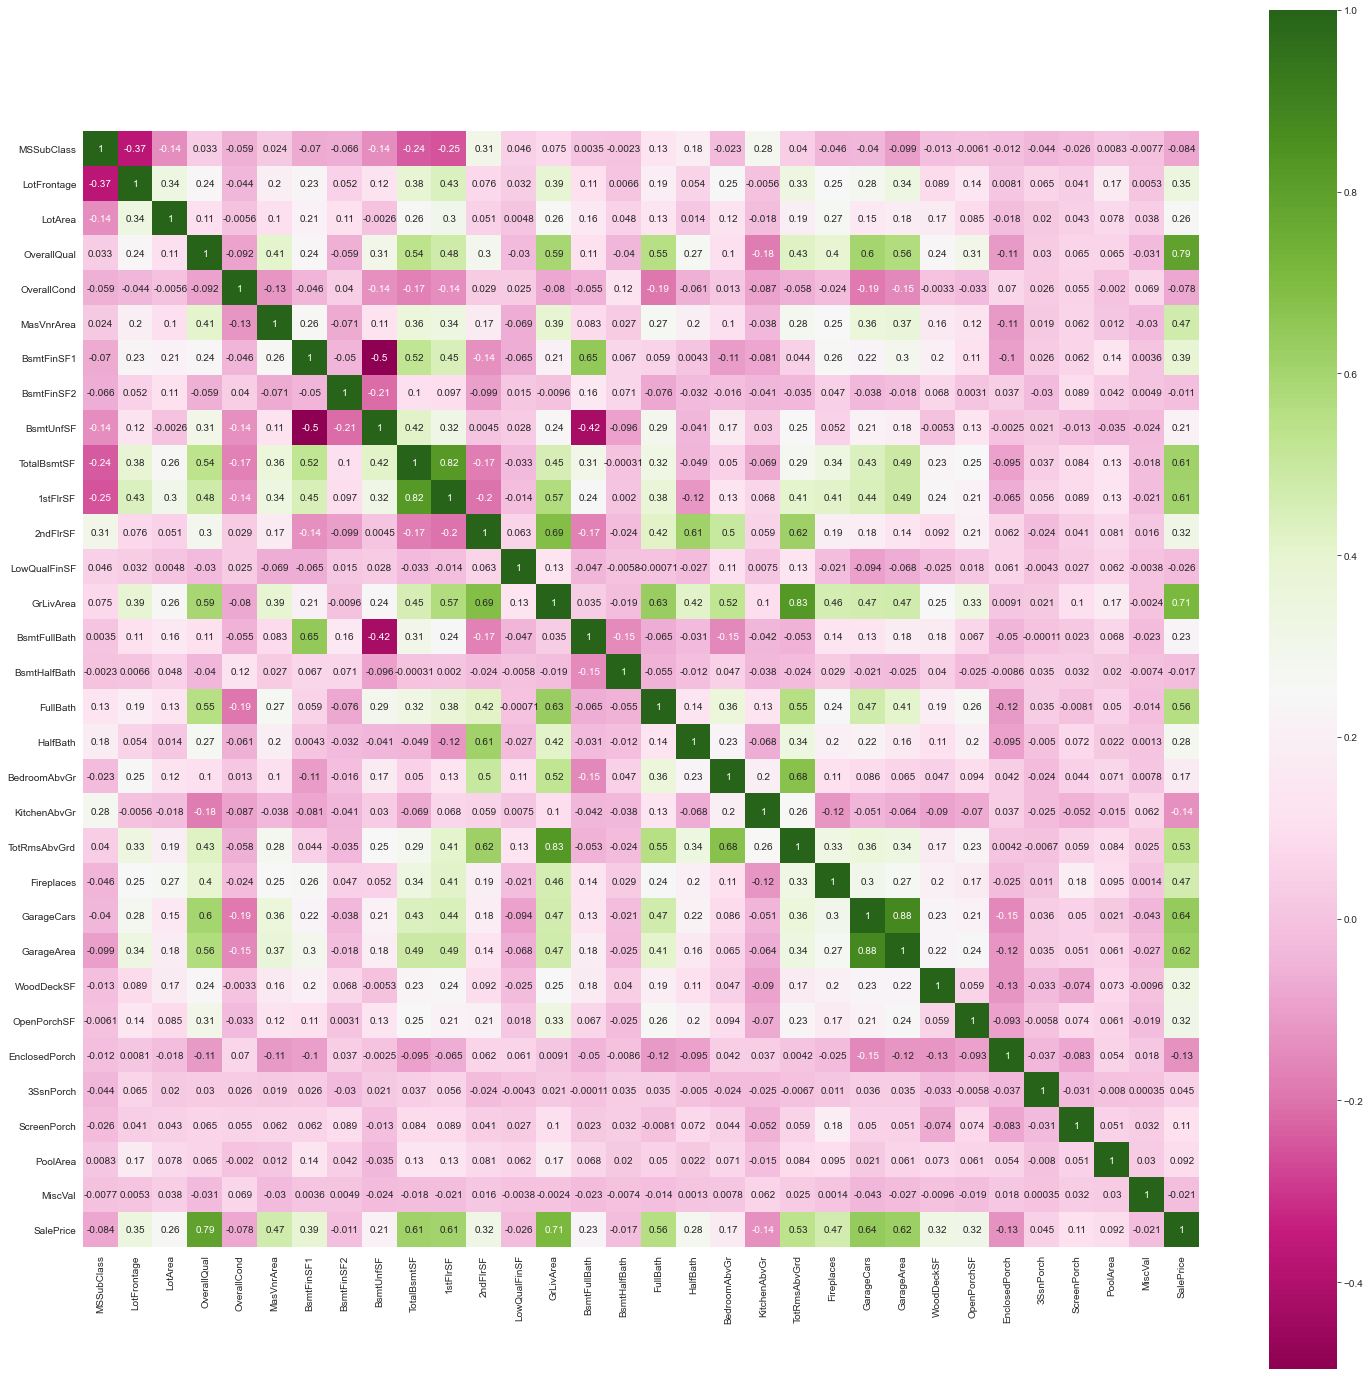

In [433]:
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(train_corr, square=True, cmap= 'PiYG', annot = True)
plt.show()

#### Зависимость между стоимостью дома и его харатеристиками
Из тепловой карты можно сделать вывод, что лишь третья часть переменных средне или сильно влияют на стоимость жилого дома. Во многих парах "Характристика-Стоимость дома" коэффициент корреляции находится в промежутке от 0 до 0.5. В таких случаях существует  очень слабая (от 0 до 0.2) или слабая (от 0.2 до 0.5) положительная зависимость между двумя переменными. Корреляция в промежутке от 0.5 до 0.7 является средней положительной, от 0.7 до 0.9 - сильной положительной, от 0.9 до 1 - очень сильной положительной.

* Слабой (или очень слабой) положительной корреляцией со стоимостью дома обладают, например, BsmtFinSF1 (готовая площадь подвала), 2ndFlrSF (площадь второго этажа) или PoolArea (площадь бассейна);
* Практически все характеристики оказывают среднее влияние на стоимость дома, находясь в промежутке от 0.5 до 0.7. Например, 1stFlrSF (площадь 1ого этажа), GarageCars (сколько машин поместиться в гараж) и GarageArea (площадь гаража)
* Лишь 2 характеристики оказывают высокое влияние на стоимость дома. Это OverallQual (степень готовности дома) и GrLivArea (общая жилая площадь дома)

Помимо положительной корреляции от 0 до 1, корреляция может быть отрицательной (от -1 до 0). Это означает, что поведение одной переменной будет противоположным поведению другой. Простыми словами, если значение первой будет возрастать, то вторая будет уменьшаться, и наоборот.

* Между некоторыми переменными и стоимостью дома имеет место быть очень слабая отрицательная корреляция, не превышающая по значению -0.15. Например, переменная Low quality finished square feet (all floors) означает площадь дома с отделкой низкого качества (на всех этажах). Логично, что, если отделка низкого качества, то чем больше такой отделки, тем ниже стоимость дома. Поэтому между этой переменной существует очень слабая, но отрицательная корреляция (-0.11)

#### Зависимость между характеристиками дома (без учёта его стоимости)
Отдельно хотелось бы сказать о том, что на тепловой карте можно заметить сильную/среднюю корреляцию (как отрицательную, так и положительную) между самими харатеристиками дома. 
* Коэффициентом корреляции -0.5 обладают BsmtUnfSF и BsmtFinSF1. Первая переменная представляет собой незаконченную площадь подвала (цокольного этажа), вторая - законченную площадь подвала. Чем большая площадь подвала становится законченной, тем меньшую площадь остаётся доделывать. Отсюда и сильная отрицательная корреляция. Такая же ситуация и между BsmtUnfSF и BsmtFullBath.
* Достаточно высоким коэффициентом корреляции (больше 0.8) обладают пары TotalBsmtSF и 1stFlrSF (чем больше площадь подвала, тем больше площадь первого этажа), GrLivArea и TotRmsAbvGrd (чем больше общая площадь дома, тем больше в нём комнат), GarageCars и GarageArea (чем больше площадь гаража, тем больше машин в него поместится).


#### Вывод из тепловой карты
*Во-первых, надо упомянуть о том моменте, что в тепловой карте были представлены зависимости между стоимостью дома и только количественными переменными. Для качественных переменных анализ будет проведён отдельно.*

Во-вторых, можно сказать, что лишь малая часть из рассмотренных характеристик дома влиеяте на его стоимость. Остальные или вообще не влияют на формирование стоимости дома, или влияют лишь в незначительной степени. 

Чтобы нагляднее изобразить зависимость между переменными, можно воспользоваться диаграммой рассеяния. Строить этот вид диаграммы мы будем только для тех переменных, которые средне или сильно оказывают влияние на стоимость дома, а именно:
  * OverallQual
  * TotalBsmtSF
  * 1stFlrSF
  * GrLivArea
  * FullBath
  * TotRmsAbvGrd
  * GarageCars
  * GarageArea

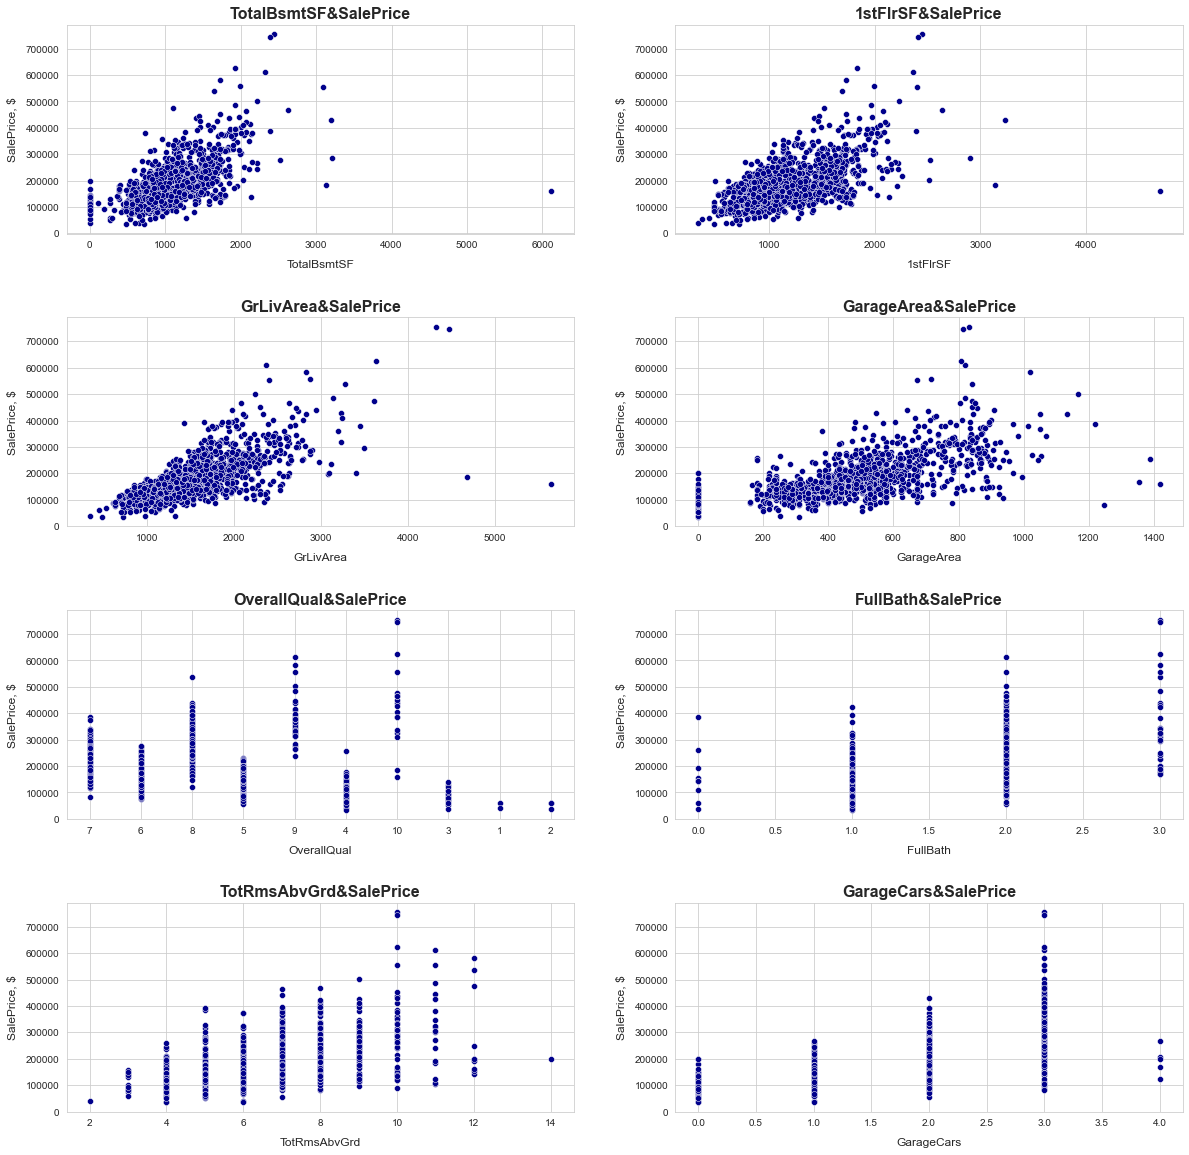

In [448]:
signif_char = ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'OverallQual', 'FullBath', \
               'TotRmsAbvGrd', 'GarageCars']

fig, ax = plt.subplots(figsize=(20, 20))
sns.set_style('whitegrid')

num = 0
for i in range(1, 9):
    plt.subplot(4,2,i)
    sns.scatterplot(data = train, x = train[signif_char[num]], y = train['SalePrice'], c = ['darkblue'])
    plt.xlabel(signif_char[num], fontsize = 12, labelpad= 10)
    plt.ylabel('SalePrice, $', fontsize = 12, labelpad = 8)
    plt.title('{}&SalePrice'.format(signif_char[num]), fontweight = 'bold', fontsize = 16)
    num += 1
    
plt.subplots_adjust(hspace = 0.4)
plt.show()    


Из графиков видна чёткая положительная зависимость между представленными переменными и стоимостью дома. 

Чем выше общая жилая площадь дома или площадь гаража - тем выше стоимость дома. Чем ближе дом находится к состоянию полной готовности или чем больше комнат в доме - опять же, тем выше его стоимость.

  
  Переменная OverallQual была рассмотрена как количественная. Хоть из графика и видна прямая зависимость между степенью готовности дома и его стоимостью, вероятно, будет более удобным рассмотреть эту переменную в роли качественной. 
На графике OverallQual принимает значения от 1 до 10, где 1 - "very poor", а 10 - "very excellent". С помощью такого графика, как boxplot, мы увидим:
* как растёт стоимость дома исходя из его готовности;
* стоимостной диапазон дома в пределах каждой степени готовности (размах);
* медиану и выбросы для каждой степени готовности дома.

Text(0.5, 0, 'Overall Quality')

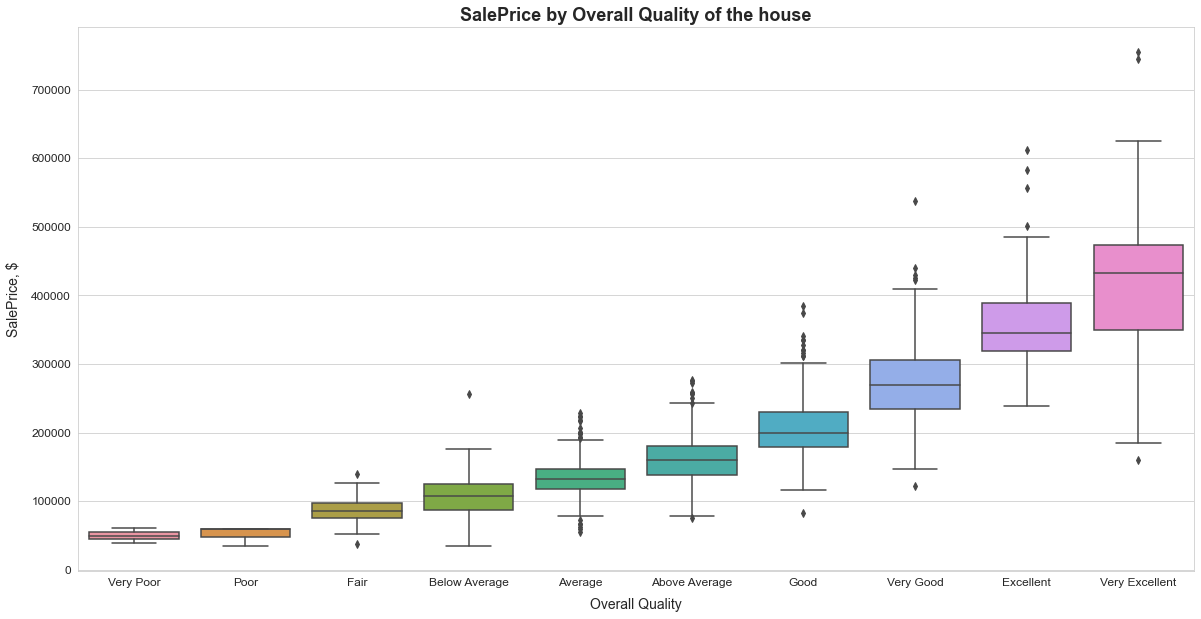

In [435]:
train['OverallQual'] =  train['OverallQual'].astype(str)
order_list = {'1': 'Very Poor', '2': 'Poor', '3': 'Fair', '4': 'Below Average','5': 'Average', \
              '6': 'Above Average', '7': 'Good', '8': 'Very Good', '9': 'Excellent', \
              '10': 'Very Excellent'}

fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data = train, x = train['OverallQual'], y = train['SalePrice'], order = order_list)
plt.title('SalePrice by Overall Quality of the house', fontweight = 'bold', fontsize = 18)
ax.set_xticks(range(0, 10))
ax.set_xticklabels(order_list.values(), fontsize = 12)
ax.set_yticks(range(0, 800000, 100000))
ax.set_yticklabels(range(0, 800000, 100000), fontsize = 12)

plt.ylabel('SalePrice, $', fontsize = 14, labelpad = 10)
plt.xlabel('Overall Quality', fontsize = 14, labelpad = 10)



Из графика можно подтвердить наличие зависимости между степенью готовности дома и его стоимостью. Как правило, чем выше степень готовности, тем больший разброс в стоимости домов наблюдается.

Линия внутри блока представляет собой средняя стоимость дома (медиану) для каждой степени готовности. Хоть по значениям степени готовности и пересекаются между собой, для каждой из них установлена своя медиана. Эта медиана больше по значению, чем на предыдущей стадии, и меньше, чем на следующей. 

Также, на графиках можно увидеть наличие выбросов практически у каждой степени готовности (кроме very poor и poor).


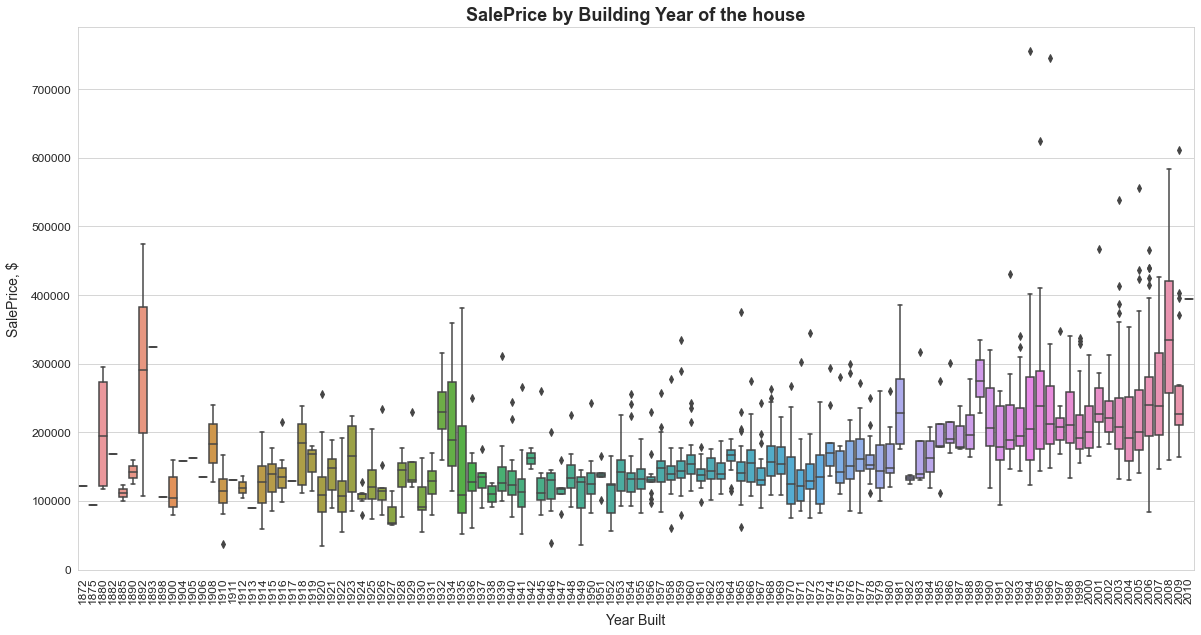

In [436]:
# train['YearBuilt']
years = train['YearBuilt'].astype(int).sort_values(ascending = True).unique()
years = years.astype(str)

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data = train, x = train['YearBuilt'], y = train['SalePrice'], order = years)
plt.title('SalePrice by Building Year of the house', fontweight = 'bold', fontsize = 18)
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years, fontsize = 12, rotation = 90)
ax.set_yticks(range(0, 800000, 100000))
ax.set_yticklabels(range(0, 800000, 100000), fontsize = 12)
plt.ylabel('SalePrice, $', fontsize = 14, labelpad = 10)
plt.xlabel('Year Built', fontsize = 14, labelpad = 10)
plt.show()

Из графика можно сказать, год постройки дома хоть и незначительно, но всё же может повлиять на его стоимость. Люди готовы заплатить большую цена за более новые дома. Но, при этом, дома 1892 или 1932 года постройки находятся на таком же уровне стоимости, как и современные.

В исходной таблице содержится около 50 качественных переменных. Для того, чтобы быстро построить график для каждой из них и при этом не прописывать код для каждого графика, воспользуемся циклом. Для начала, создадим список со всеми столбцами исходной таблицы. С помощью цикла for пройдёмся по ним, однако, графики будут строиться исходя из принадлежности переменной к типу object.

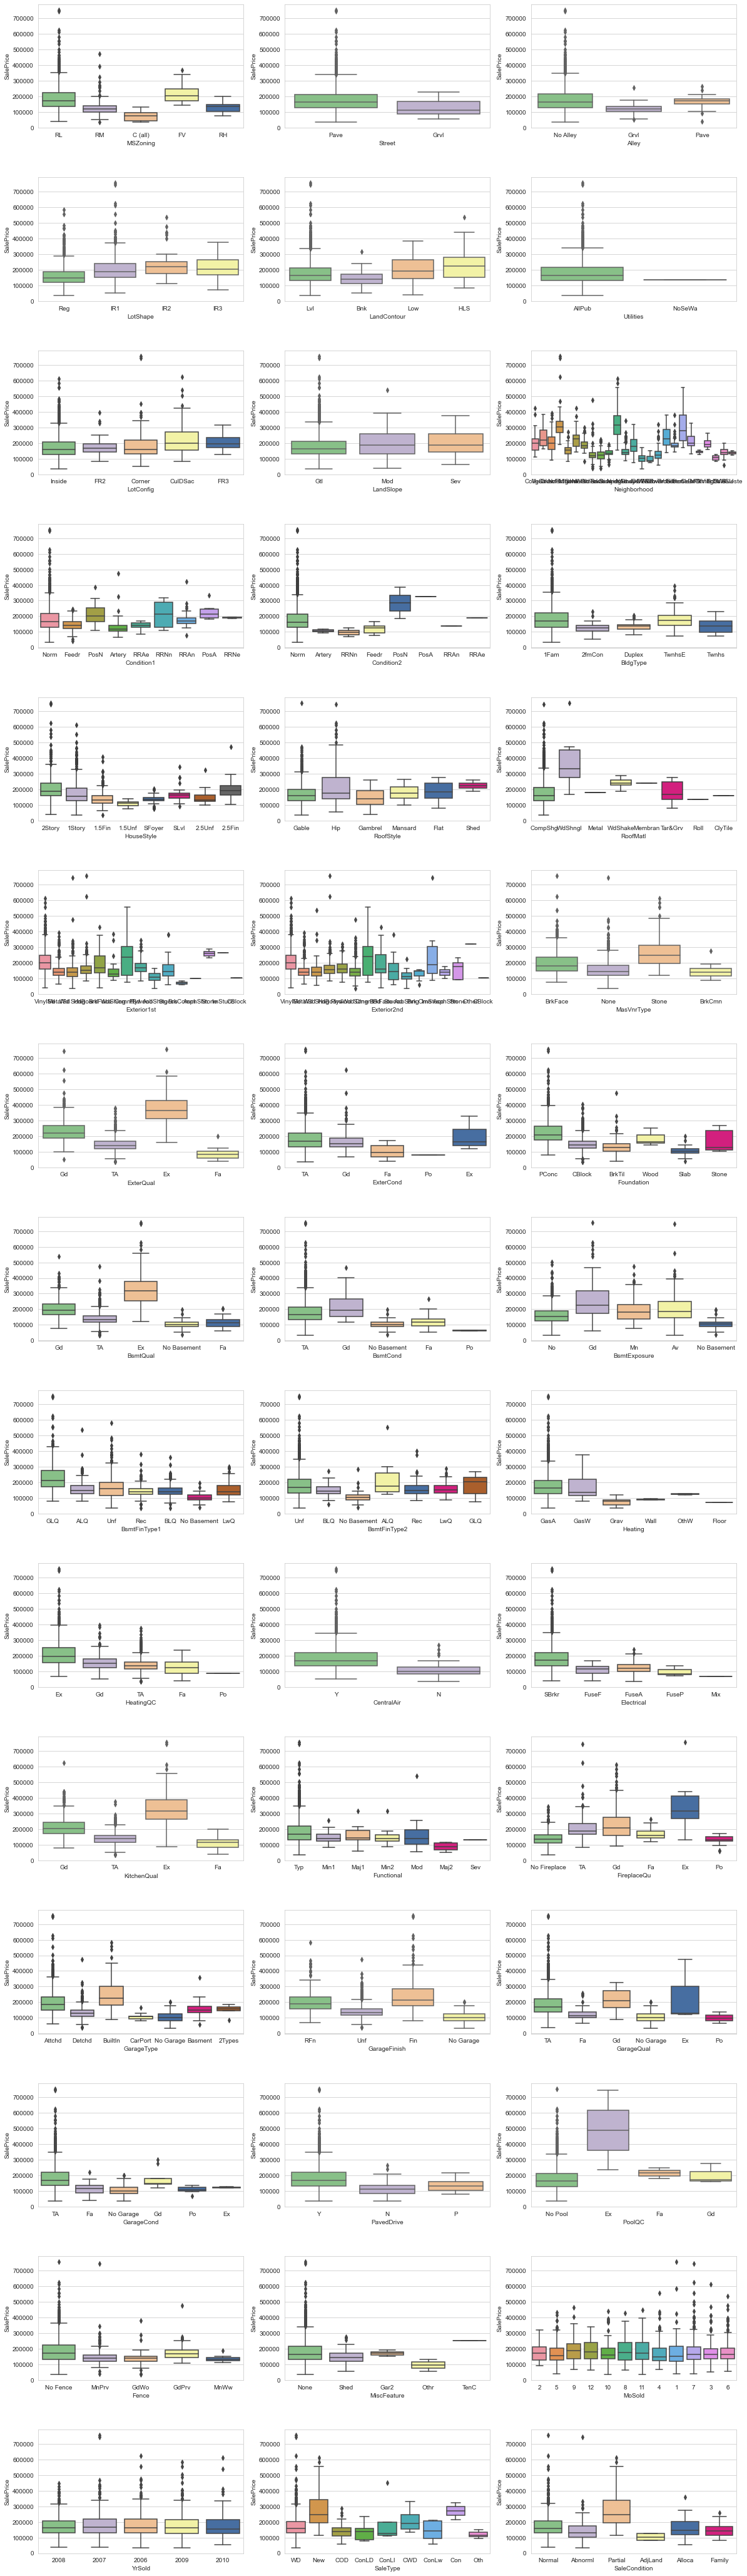

In [438]:
column_names = train.columns.tolist()
del column_names[0]
column_names.remove('YearBuilt')
column_names.remove('OverallQual')

num = 1
fig, ax = plt.subplots(figsize=(20, 80))
sns.set_palette("Accent")
for i in range(1, (len(column_names)+1)):
    if train[column_names[i-1]].dtype == object:
        plt.subplot(16, 3, num)
        sns.boxplot(data = train, x = train[column_names[i-1]], y = train['SalePrice'])
        num += 1
plt.subplots_adjust(hspace = 0.4)
plt.show()


Из графиков можно сказать, что большинство рассмотренных переменных особым образом не влияют на стоимость дома.
Взять, например, форму дома (LotShape). В этом столбце выделяют 4 формы (Reg, IR1, IR2, IR3) и у каждой из них практически одинаковый ценовой диапазон. Различия, в стоимостном диапазоне здесь, вероятнее всего, обусловлены другими более значимыми факторами, например, площадью дома или наличием гаража.

У всех перменных, связанных с качеством или характеристиками того или иного элемента дома (ExterCond, ExterQual, BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQU, GarageQual), есть одна общая черта. Чем выше их качество или чем лучше их характеристики, тем выше средняя стоимость (медиана) дома. Это говорит о том, что люди готовы платить больше, но при условии, что материалы, элементы и удобства будут соответствовать заявленной стоимости.

Для наглядности, продемонстрируем пример влияния высоты подвала (BsmtQual)  и качества материалов внешней стороны дома (ExterQual) на его стоимость. Из графиков ниже виден чёткий рост средней стоимости домов при возрастании качества материалов их внешней стороны (левый график) и увеличении высоты подвала (правый график).

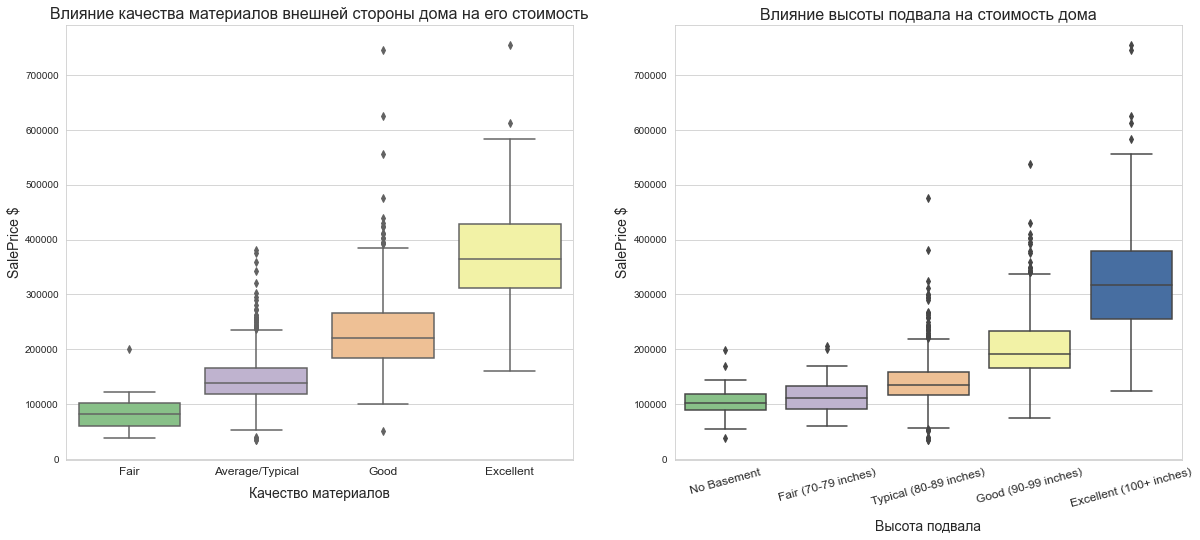

In [439]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
labels_ext = {'Fa': 'Fair', 'TA': 'Average/Typical', 'Gd': 'Good', 'Ex': 'Excellent'}
labels_bsmt = {'No Basement': 'No Basement', 'Fa': 'Fair (70-79 inches)', 'TA': 'Typical (80-89 inches)', \
               'Gd': 'Good (90-99 inches)', 'Ex': 'Excellent (100+ inches)'}

sns.boxplot(ax = ax1, data = train, x = train['ExterQual'], y = train['SalePrice'], order = labels_ext.keys())
ax1.set_title('Влияние качества материалов внешней стороны дома на его стоимость', fontsize = 16)
ax1.set_xlabel('Качество материалов', fontsize = 14, labelpad = 10)
ax1.set_ylabel('SalePrice $', fontsize = 14)
ax1.set_xticks(range(0, 4))
ax1.set_xticklabels(labels_ext.values(), fontsize = 12)

sns.boxplot(ax = ax2, data = train, x = train['BsmtQual'], y = train['SalePrice'], order = labels_bsmt.keys())
ax2.set_title('Влияние высоты подвала на стоимость дома', fontsize = 16)
ax2.set_xlabel('Высота подвала', fontsize = 14, labelpad = 10)
ax2.set_ylabel('SalePrice $', fontsize = 14)
ax2.set_xticks(range(0, 5))
ax2.set_xticklabels(labels_bsmt.values(), rotation = 15, fontsize = 12)

plt.show()

Из boxplot трудно сказать, как соседство (Neighborhood) влияет на стоимость дома. Поэтому, построим столбчатую диаграмму для средней стоимости домов в каждом соседстве и сравним их с общей средней стоимость всех домов.

In [440]:
gr_by_neighborhood = gr_by_neigh = train.groupby('Neighborhood')['SalePrice'].mean().reset_index()
gr_by_neighborhood = gr_by_neighborhood.sort_values(by = 'SalePrice').reset_index(drop=True)
# print(gr_by_neighborhood)

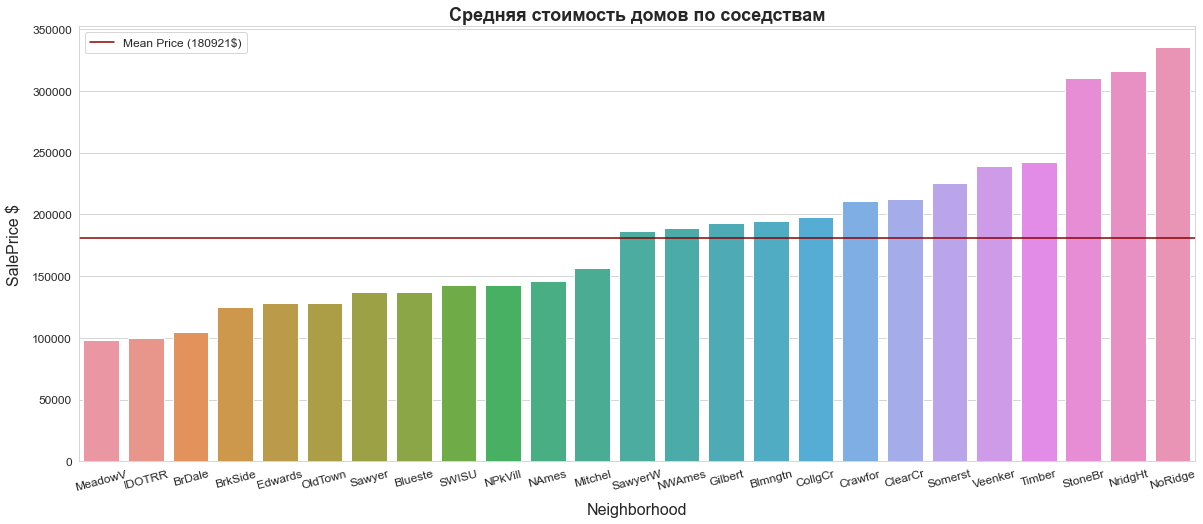

In [441]:
fig, ax = plt.subplots(figsize = (20, 8))
sns.set_palette("Pastel1")
sns.set_style('whitegrid')

sns.barplot(data = gr_by_neighborhood, x = 'Neighborhood', y = 'SalePrice')
plt.title('Средняя стоимость домов по соседствам', fontweight = 'bold', fontsize = 18)
plt.xlabel('Neighborhood', fontsize = 16, labelpad = 10)
plt.ylabel('SalePrice $', fontsize = 16, labelpad = 10)
ax.set_xticks(range(len(gr_by_neighborhood)))
ax.set_xticklabels(gr_by_neighborhood['Neighborhood'], fontsize = 12, rotation = 15)
ax.set_yticks(range(0, 400000, 50000))
ax.set_yticklabels(range(0, 400000, 50000), fontsize = 12)
plt.axhline(mean_price, color = 'darkred', linestyle = 'solid', label = 'Mean Price ({}$)'.\
            format(int(mean_price)))
plt.legend(fontsize = 12)

plt.show()

Из графика выше видно, что стоимость домов по соседствам сильно различается. В половине соседств предлагаются дома по стоимости ниже средней, во второй половине - выше.

Можно сделать вывод, что между соседством и стоимостью дома есть зависимость. В соседстве MeadowV средняя стоимость жилья составляет около 100000\\$, тогда как в NridgHt или NoRidge этот показатель больше, чем в 3 раза (около 320000\\$ и 340000\\$ соответственно).


Ещё два показателя, которые позволят получить более полную картину о влиянии на стоимость домов - это месяц и год их продажи.
Чтобы не создавать два отдельных графика, а показать тренды в стоимости с изменением времени, создадим новый фрейм с колонками MoSold, YrSold и SalePrice, а затем сгруппируем их по датам и выведем среднюю стоимость домов.

In [449]:
months = {'1':'January', '2':'February', '3':'March', '4':'April', '5':'May', '6':'June', '7':'July', \
          '8':'August', '9':'September',\
          '10':'October', '11':'November', '12':'December'}
new = train[['MoSold', 'YrSold', 'SalePrice']].copy()

new['MoSold'] = new['MoSold'].astype(int)

new = new.sort_values(by = ['YrSold', 'MoSold'])

new_groupby = new.groupby(['YrSold', 'MoSold'])['SalePrice'].mean().reset_index()
new_groupby['Month'] = new_groupby['MoSold']
for i in range(len(new_groupby)):
    mon = new_groupby.loc[i, 'MoSold']
    new_groupby.loc[i, 'Month'] = months[str(mon)]  
new_groupby['MonthYearSold'] = new_groupby['Month'] + ' ' + new_groupby['YrSold']
new_groupby['SalePrice'] = new_groupby['SalePrice'].round(2)


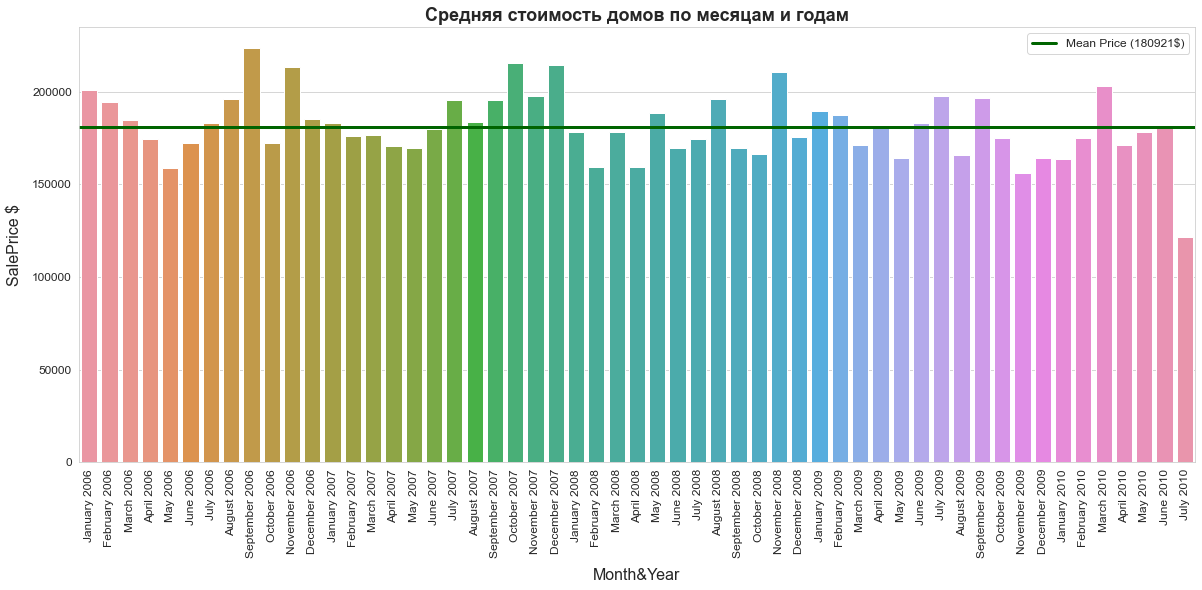

In [450]:
fig, ax = plt.subplots(figsize = (20, 8))
sns.set_palette("Pastel1")
sns.set_style('whitegrid')

sns.barplot(data = new_groupby, x = 'MonthYearSold', y = 'SalePrice')
plt.title('Средняя стоимость домов по месяцам и годам', fontweight = 'bold', fontsize = 18)
plt.xlabel('Month&Year', fontsize = 16, labelpad = 10)
plt.ylabel('SalePrice $', fontsize = 16, labelpad = 10)
ax.set_xticks(range(len(new_groupby)))
ax.set_xticklabels(new_groupby['MonthYearSold'], fontsize = 12, rotation = 90)
ax.set_yticks(range(0, 250000, 50000))
ax.set_yticklabels(range(0, 250000, 50000), fontsize = 12)
plt.axhline(mean_price, color = 'darkgreen', linewidth = 3, linestyle = 'solid', \
            label = 'Mean Price ({}$)'.format(int(mean_price)))
plt.legend(fontsize = 12)

plt.show()

Из графика можно сказать, что средняя стоимость домов колеблется со временем, однако серьёзных и значительных изменений не наблюдается. Вероятно, можно говорить об отсутствии чётко выраженной сезонности в данных. 
До осени 2008 года можно было заметить закономерность: зимой и осенью средняя стоимость домов находится на уровне общей средней стоимость, весной она падает, а летом опять возрастает.

Попробуем ещё раз сгруппировать данные по месяцам и годам, но на этот раз добавим в таблицу не среднее значение стоимости, а сумму.

In [444]:
new_groupby_sum = new.groupby(['YrSold', 'MoSold'])['SalePrice'].sum().\
reset_index()
new_groupby_sum['Month'] = new_groupby_sum['MoSold']
for i in range(len(new_groupby_sum)):
    mon = new_groupby_sum.loc[i, 'MoSold']
    new_groupby_sum.loc[i, 'Month'] = months[str(mon)]  
new_groupby_sum['MonthYearSold'] = new_groupby_sum['Month'] + ' ' + \
new_groupby_sum['YrSold']
new_groupby_sum['SalePrice'] = new_groupby_sum['SalePrice'].round(2)

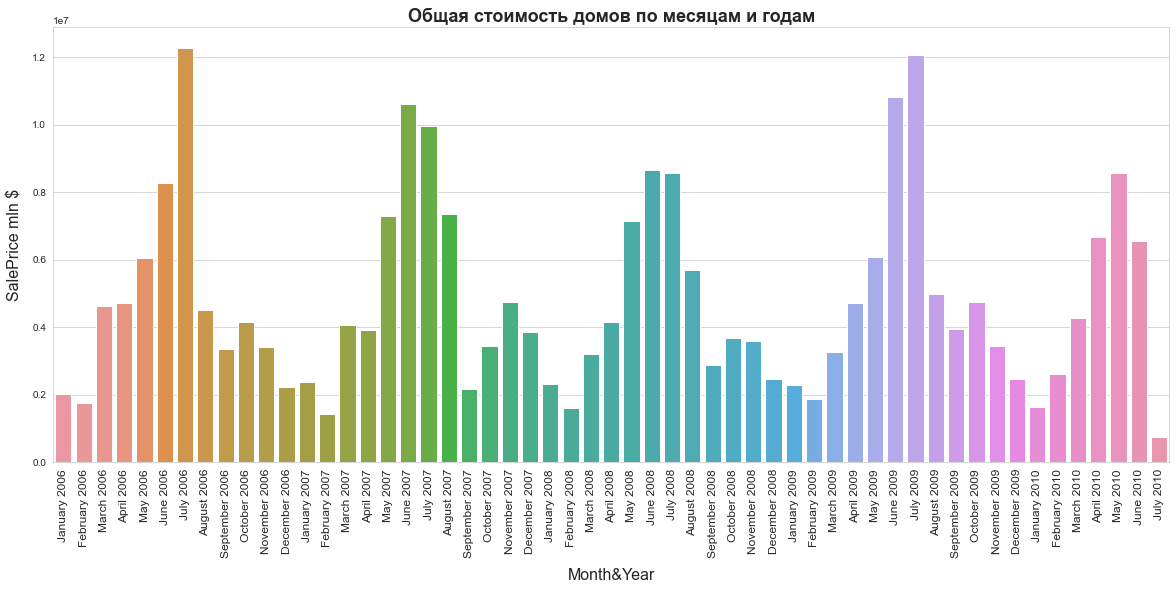

In [445]:
fig, ax = plt.subplots(figsize = (20, 8))
sns.set_palette("Pastel1")
sns.set_style('whitegrid')

sns.barplot(data = new_groupby_sum, x = 'MonthYearSold', y = 'SalePrice')
plt.title('Общая стоимость домов по месяцам и годам', fontweight = 'bold', \
          fontsize = 18)
plt.xlabel('Month&Year', fontsize = 16, labelpad = 10)
plt.ylabel('SalePrice mln $', fontsize = 16, labelpad = 10)
ax.set_xticks(range(len(new_groupby_sum)))
ax.set_xticklabels(new_groupby_sum['MonthYearSold'], fontsize = 12, \
                   rotation = 90)

plt.show()

На данном графике лучше прослеживается сезонность общей суммы проданных домов. Летом общая сумма продаж всегда возрастает. До 2008 года (включительно) пик приходился на июнь, в 2009 - на июль, а в 2010 на май. В 2010 в июле можно наблюдать крайне низкую общую сумму продаж. Такое значение может быть объяснено тем, что исходная таблица была составлена с учётом лишь нескольких продаж за июль и, поэтому, содержит слишком мало записей.

Помимо возрастания общей суммы продаж летом, можно говорить о низком числе продаж зимой, преимущественно в феврале. Продажи весной и осенью находятся практически на одном уровне. Однако, весной они растут, а осенью падают.

 # Вывод
 В данном исследовании была рассмотрена таблица с данными касательно степени влияния различных факторов на стоимость жилых домов.
 
 В результате различных манипуляций с данными (заполнение пропущенных значений, создание новых таблицы на основе исходных данных, визуализация) нам удалось выяснить, что не так много характеристик из 79 представленных действительно влияют на стоимость дома. В основном, стоимость находится под воздействием таких параметров, как общая площадь, площадь подвала и гаража, степень готовности дома. При увеличении этих переменных, возрастает и сама стоимость. 
 
 Существуют и такие характеристики, с увеличением которых стоимость дома может хоть и незначительно, но понижаться (т.е. между ними существует обратная зависимость). Например, чем большая площадь дома отделана дешёвыми и некачественными материалами, тем ниже будет его тоимость.
 
 Люди платят больше за те дома, у которых лучше качества материалов, большая вместимость гаража, общая площадь. На их выбор мало влияют такие характеристики, как форма дома, площадь бассейна или площадь крыльца перед домом.
 
 Также, стоит упомянуть о различии в стоимости домов между всем рассмотренными соседствами. Например, если рассматривать среднюю стоимость домов, в соседстве MeadowV за 300000\\$ вы сможете купить 3 дома. Тогда как в соседстве NoRidge вы не сможете купить и одного.
 
 В самом конце исследования мы выяснили, что при формировании стоимости домов имеет место сезонность. Как при рассмотрении средней стоимости, так и при рассмотрении общей стоимости проданых жилых домов в период с января 2006 года по июль 2010. Дома выгоднее покупать в летние месяцы, так как в этот период их стоимость падает. Это подтверждается и тем фактом, что общая стоимость всех проданных домов в летний период выше, чем в любой другой.